In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff



In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240910_140319.braidz")
df,csvs["opto"]
data1 = extract_stimulus_centered_data(df, csvs["opto"])
list(data1)
AngV1 = data1['angular_velocity']


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240910_140319.braidz using pyarrow


In [5]:

print(csvs["opto"].columns)


Index(['obj_id', 'frame', 'x', 'y', 'z', 'xvel', 'yvel', 'zvel', 'P00', 'P01',
       'P02', 'P11', 'P12', 'P22', 'P33', 'P44', 'P55', 'heading'],
      dtype='object')


In [3]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240912_140309.braidz")
df,csvs["opto"]
data2 = extract_stimulus_centered_data(df, csvs["opto"])
list(data2)
AngV2 = data2['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240912_140309.braidz using pyarrow


In [4]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240914_140037.braidz")
df,csvs["opto"]
data3 = extract_stimulus_centered_data(df, csvs["opto"])
list(data3)
AngV3 = data3['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240914_140037.braidz using pyarrow


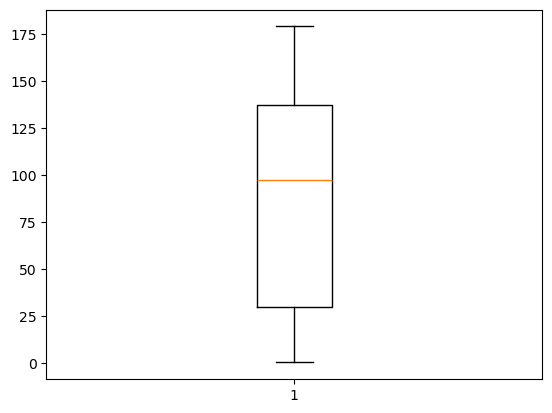

In [5]:
heading_diffs2 = []
for traj in data2["position"]:
    heading_diffs2.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs2))
plt.show()



In [ ]:
heading_diffs2 = []
for traj in data2["position"]:
    heading_diffs2.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs2))
plt.show()



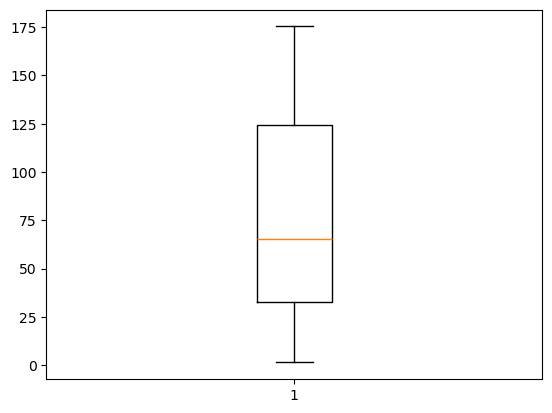

In [6]:
heading_diffs3 = []
for traj in data3["position"]:
    heading_diffs3.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs3))
plt.show()

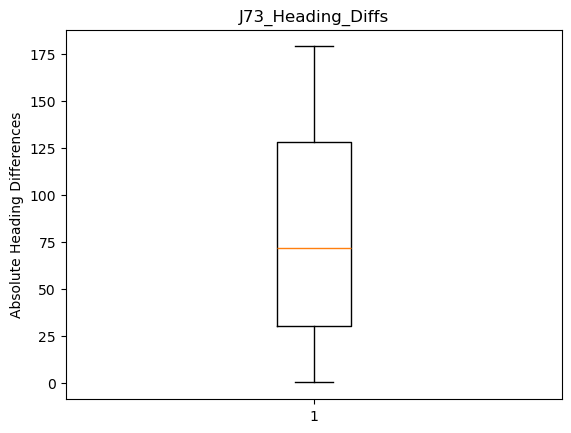

In [30]:
# Combine the heading differences from both repeats
heeading_diffs_J73 = heading_diffs2 + heading_diffs3

# Plot the combined heading differences
plt.figure()
plt.boxplot(np.abs(heeading_diffs_J73))
plt.title("J73_Heading_Diffs")
plt.ylabel("Absolute Heading Differences")
plt.show()


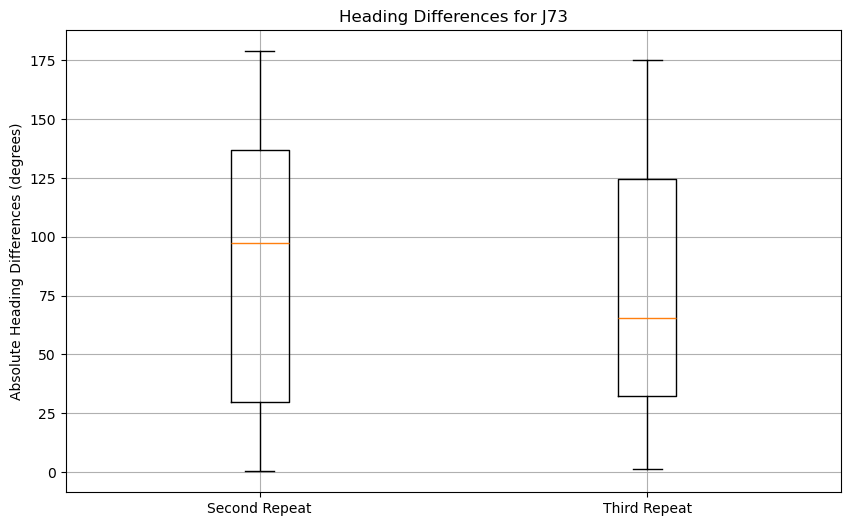

In [37]:


# Plot the heading differences side by side
plt.figure(figsize=(10, 6))
plt.boxplot([np.abs(heading_diffs2), np.abs(heading_diffs3)], labels=["Second Repeat", "Third Repeat"])
plt.title("Heading Differences for J73")
plt.ylabel("Absolute Heading Differences (degrees)")
plt.grid(True)
plt.show()



In [8]:
AngV_J73_Gal4 = np.concatenate([AngV2, AngV3])


In [22]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz")
df,csvs["opto"]
data4 = extract_stimulus_centered_data(df, csvs["opto"])
list(data4)
AngV4 = data4['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz using pyarrow


In [23]:
heading_diffs4 = []
for traj in data4["position"]:
    heading_diffs4.append(heading_direction_diff(traj, origin=50, end=80, n=10))



In [24]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz")
df,csvs["opto"]
data5 = extract_stimulus_centered_data(df, csvs["opto"])
list(data2)
AngV5 = data5['angular_velocity']


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz using pyarrow


In [25]:
heading_diffs5 = []
for traj in data5["position"]:
    heading_diffs5.append(heading_direction_diff(traj, origin=50, end=80, n=10))


In [26]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz")
df,csvs["opto"]
data6 = extract_stimulus_centered_data(df, csvs["opto"])
list(data6)
AngV6 = data6['angular_velocity']
print(AngV6)

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz using pyarrow
[array([-2.19488280e+03, -1.14381708e+03, -5.64235712e+02, -2.20319419e+02,
        6.19422931e+01,  1.43478323e+02,  1.69383130e+02,  2.88589199e+02,
        3.27926779e+02,  2.48769045e+02,  1.89946979e+02,  2.87379207e+02,
        2.94222114e+02,  2.38269322e+02,  1.94926610e+02,  1.48229419e+02,
        1.59975448e+02,  1.57097546e+02,  1.38447030e+02,  1.23980242e+02,
        1.34896258e+02,  1.58770810e+02,  1.81272851e+02,  1.29789428e+02,
        7.92483523e+01,  3.17804151e+01,  4.25930363e+01,  2.66781099e+01,
       -3.28832569e+01,  5.98670901e-01,  1.36575206e+02,  2.00912004e+02,
        2.03379650e+01, -2.07140451e+02, -1.34967719e+02, -6.47771226e+01,
       -9.61185969e+01,  8.86387760e+01,  6.56146045e+01,  2.12570756e+01,
       -8.75873828e+01, -1.31769769e+02, -1.10898264e+01, -1.16633932e+02,
       -1.07940916e+02, -2.29395097e+01,  1.62199216e+02,  2.14869602e+02,
        6.84

In [27]:
heading_diffs6 = []
for traj in data6["position"]:
    heading_diffs6.append(heading_direction_diff(traj, origin=50, end=80, n=10))


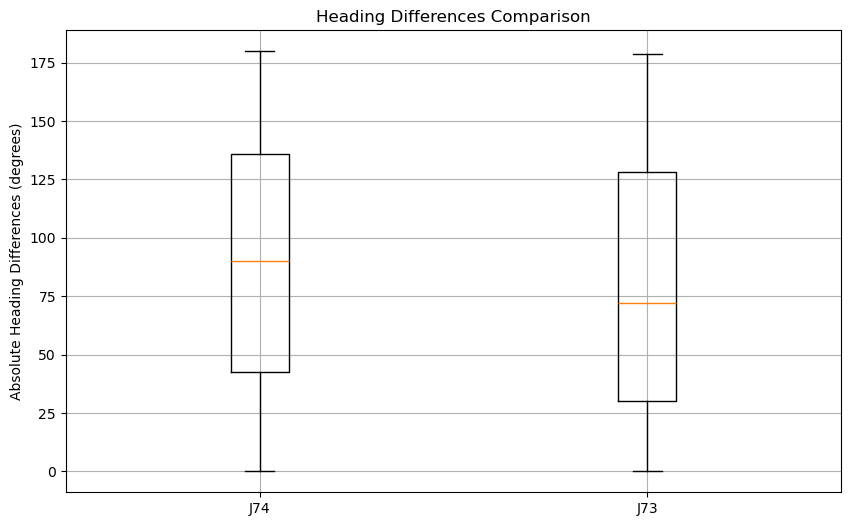

In [32]:
# Plot the heading differences side by side
plt.figure(figsize=(10, 6))
plt.boxplot([np.abs(heading_diffs_J74), np.abs(heeading_diffs_J73)], labels=["J74", "J73"])
plt.title("Heading Differences Comparison")
plt.ylabel("Absolute Heading Differences (degrees)")
plt.grid(True)
plt.show()


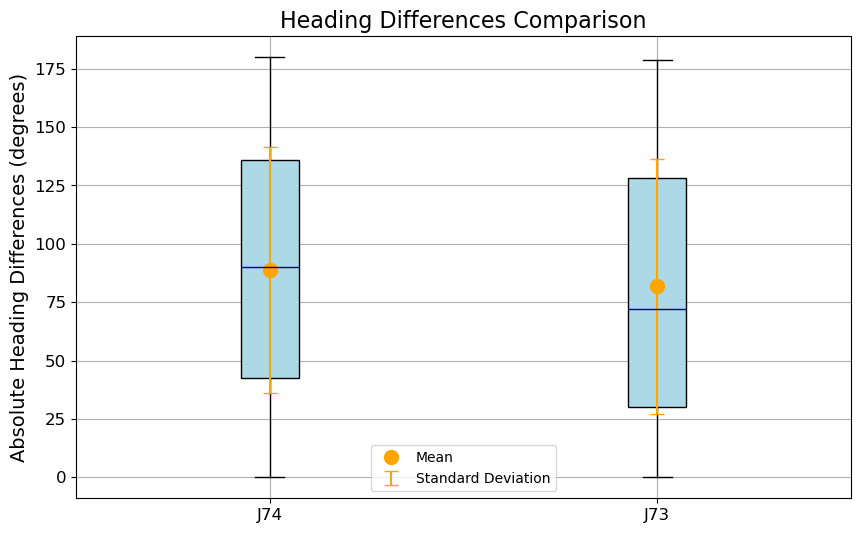

In [50]:
# Create a boxplot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([np.abs(heading_diffs_J74), np.abs(heeading_diffs_J73)], 
                      labels=["J74", "J73"],
                      patch_artist=True,  # For coloring
                      boxprops=dict(facecolor='lightblue', color='black'),
                      medianprops=dict(color='darkblue'),
                      whiskerprops=dict(color='black'),
                      capprops=dict(color='black'),
                      flierprops=dict(marker='o', color='red', markersize=5))

# Calculate means and standard deviations directly from the data
means = [np.mean(np.abs(heading_diffs_J74)), np.mean(np.abs(heeading_diffs_J73))]
stds = [np.std(np.abs(heading_diffs_J74)), np.std(np.abs(heeading_diffs_J73))]

# Add mean markers
plt.plot([1, 2], means, marker='o', color='orange', markersize=10, label='Mean', linestyle='None')

# Add error bars for standard deviation
plt.errorbar([1, 2], means, yerr=stds, fmt='none', ecolor='orange', capsize=5, label='Standard Deviation')

# Title and labels
plt.title("Heading Differences Comparison", fontsize=16)
plt.ylabel("Absolute Heading Differences (degrees)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Add legend
plt.legend()
plt.show()

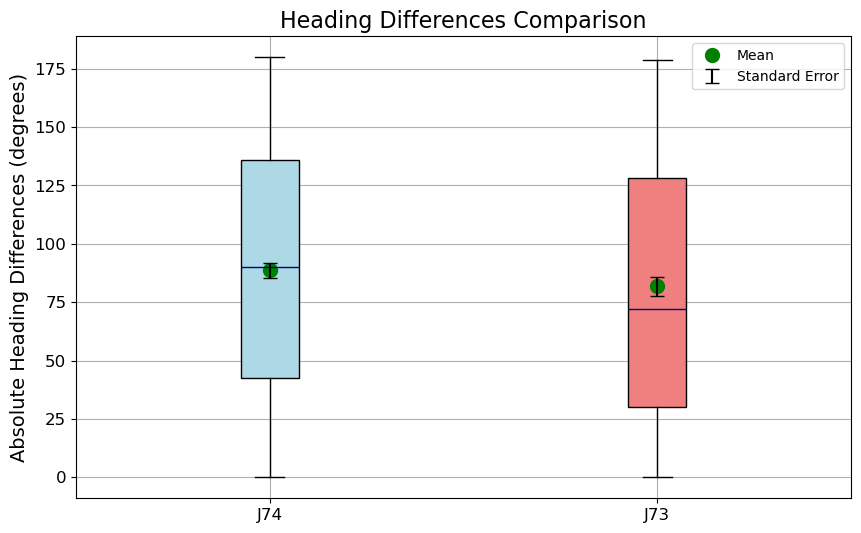

In [52]:
# Calculate means and standard errors
means = [np.mean(np.abs(heading_diffs_J74)), np.mean(np.abs(heeading_diffs_J73))]
std_errors = [np.std(np.abs(heading_diffs_J74)) / np.sqrt(len(heading_diffs_J74)),
              np.std(np.abs(heeading_diffs_J73)) / np.sqrt(len(heeading_diffs_J73))]

# Create a boxplot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([np.abs(heading_diffs_J74), np.abs(heeading_diffs_J73)], 
                      labels=["J74", "J73"],
                      patch_artist=True,  # For coloring
                      boxprops=dict(facecolor='lightblue', color='black'),
                      medianprops=dict(color='darkblue'),
                      whiskerprops=dict(color='black'),
                      capprops=dict(color='black'),
                      flierprops=dict(marker='o', color='red', markersize=5))

# Customize colors for each box
colors = ['lightblue', 'lightcoral']
for i, patch in enumerate(boxplot['boxes']):
    patch.set_facecolor(colors[i])  # Set different colors for J74 and J73

# Add mean markers
plt.plot([1, 2], means, marker='o', color='green', markersize=10, label='Mean', linestyle='None')

# Add error bars for standard error
plt.errorbar([1, 2], means, yerr=std_errors, fmt='none', ecolor='black', capsize=5, label='Standard Error')

# Title and labels
plt.title("Heading Differences Comparison", fontsize=16)
plt.ylabel("Absolute Heading Differences (degrees)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Add legend
plt.legend()
plt.show()

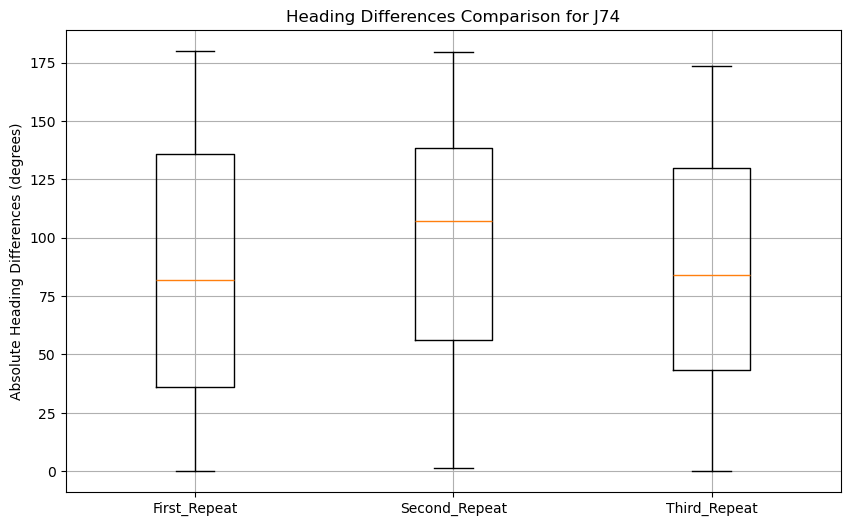

In [36]:
# Plot the heading differences side by side
plt.figure(figsize=(10, 6))
plt.boxplot([np.abs(heading_diffs4), np.abs(heading_diffs5), np.abs(heading_diffs6)], labels=["First_Repeat", "Second_Repeat","Third_Repeat"])
plt.title("Heading Differences Comparison for J74")
plt.ylabel("Absolute Heading Differences (degrees)")
plt.grid(True)
plt.show()


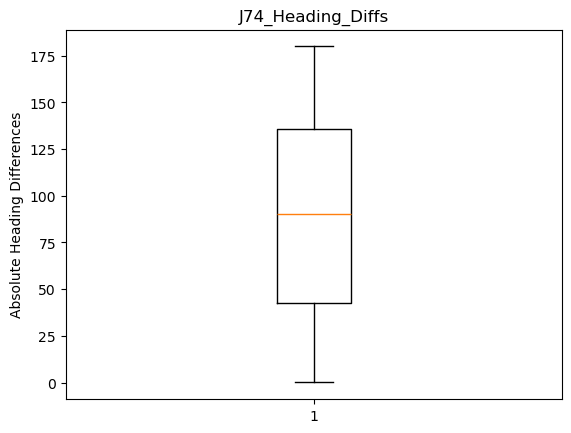

In [29]:
# Combine the heading differences from both repeats
heading_diffs_J74 = heading_diffs4 + heading_diffs5 + heading_diffs6

# Plot the combined heading differences
plt.figure()
plt.boxplot(np.abs(heading_diffs_J74))
plt.title("J74_Heading_Diffs")
plt.ylabel("Absolute Heading Differences")
plt.show()


In [40]:


# Calculate descriptive statistics
stats_J74 = {
    'Mean': np.mean(np.abs(heading_diffs_J74)),
    'Median': np.median(np.abs(heading_diffs_J74)),
    'Std Dev': np.std(np.abs(heading_diffs_J74)),
    'Min': np.min(np.abs(heading_diffs_J74)),
    'Max': np.max(np.abs(heading_diffs_J74))
}

stats_J73 = {
    'Mean': np.mean(np.abs(heeading_diffs_J73)),
    'Median': np.median(np.abs(heeading_diffs_J73)),
    'Std Dev': np.std(np.abs(heeading_diffs_J73)),
    'Min': np.min(np.abs(heeading_diffs_J73)),
    'Max': np.max(np.abs(heeading_diffs_J73))
}

# Display statistics
stats_df = pd.DataFrame({'J74': stats_J74, 'J73': stats_J73})
print(stats_df)


                J74         J73
Mean      88.626255   81.761057
Median    90.227783   72.016269
Std Dev   52.700407   54.504012
Min        0.021626    0.321592
Max      179.913142  178.888157


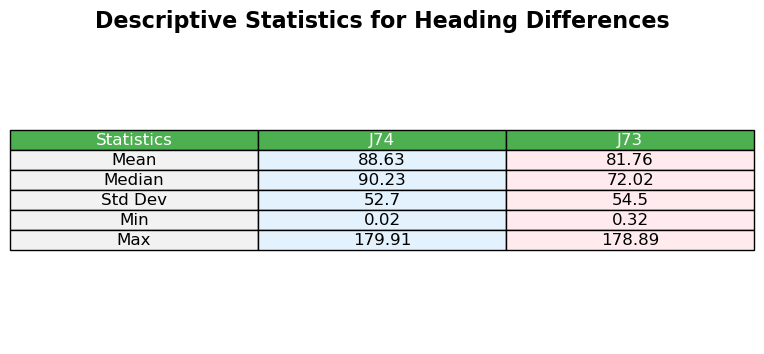

In [49]:



# Descriptive statistics data
data = {
    'Statistics': ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
    'J74': [88.63, 90.23, 52.70, 0.02, 179.91],
    'J73': [81.76, 72.02, 54.50, 0.32, 178.89]
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=np.array([data['Statistics'], data['J74'], data['J73']]).T,
                 colLabels=['Statistics', 'J74', 'J73'],
                 cellLoc='center',
                 loc='center')

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Add color to the header
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('#4CAF50')  # Green color
        cell.set_text_props(color='white')  # White text
    else:
        if j == 0:  # First column
            cell.set_facecolor('#f2f2f2')  # Light gray for first column
        elif j == 1:  # Second column (J74)
            cell.set_facecolor('#e3f2fd')  # Light blue for J74
        elif j == 2:  # Third column (J73)
            cell.set_facecolor('#ffebee')  # Light red for J73

# Add borders
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')  # Set border color
    cell.set_linewidth(1)  # Set border width

# Set title
plt.title("Descriptive Statistics for Heading Differences", fontsize=16, fontweight='bold')

# Show the plot
plt.show()



In [44]:

# Perform T-Test
t_stat, p_value_t = stats.ttest_ind(np.abs(heading_diffs_J74), np.abs(heeading_diffs_J73), equal_var=False)

# Perform Mann-Whitney U Test
u_stat, p_value_mw = stats.mannwhitneyu(np.abs(heading_diffs_J74), np.abs(heeading_diffs_J73), alternative='two-sided')

# Display results
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_value_t:.4f}")
print(f"Mann-Whitney U Test: U-statistic = {u_stat:.4f}, p-value = {p_value_mw:.4f}")



T-Test: t-statistic = 1.3379, p-value = 0.1818
Mann-Whitney U Test: U-statistic = 28272.0000, p-value = 0.1814


In [46]:
anova_stat, p_value_anova = stats.f_oneway(np.abs(heading_diffs_J74), np.abs(heeading_diffs_J73))

# Display results
print(f"ANOVA: F-statistic = {anova_stat:.4f}, p-value = {p_value_anova:.4f}")

ANOVA: F-statistic = 1.8234, p-value = 0.1776


In [47]:
kruskal_stat, p_value_kw = stats.kruskal(np.abs(heading_diffs_J74), np.abs(heeading_diffs_J73))

# Display results
print(f"Kruskal-Wallis: H-statistic = {kruskal_stat:.4f}, p-value = {p_value_kw:.4f}")

Kruskal-Wallis: H-statistic = 1.7873, p-value = 0.1813


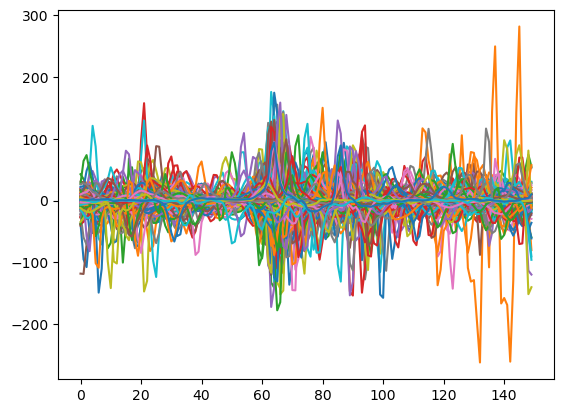

In [12]:
AngV_J74_Gal4 = np.concatenate([AngV4, AngV5, AngV6])
fig = plt.figure()
for d in AngV_J74_Gal4:
    plt.plot(d)

plt.show()

In [13]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz")
df,csvs["opto"]
data7= extract_stimulus_centered_data(df, csvs["opto"])
AngV_J64 = data7['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz using pyarrow


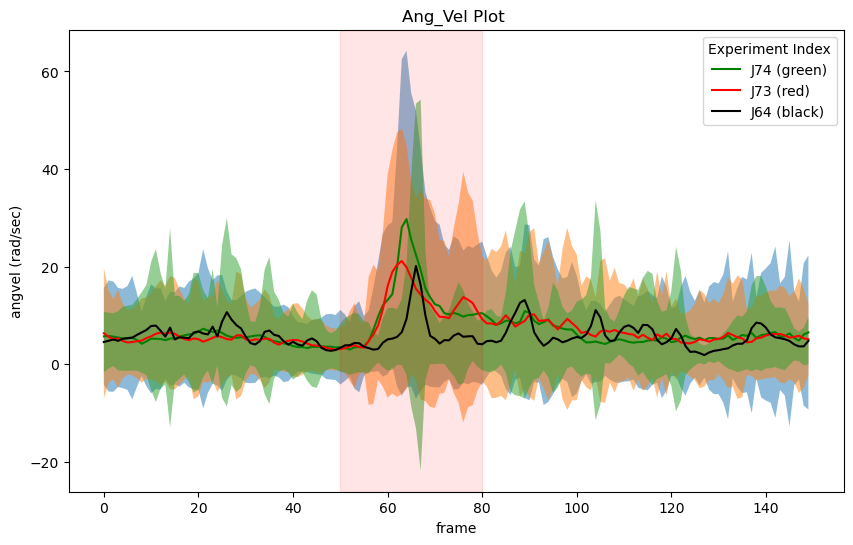

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV_J74_Gal4), ax=ax, label='J74 (green)', color='green')
plot_mean_and_std(np.abs(AngV_J73_Gal4), ax=ax, label='J73 (red)', color='red')
plot_mean_and_std(np.abs(AngV_J64), ax=ax, label='J64 (black)', color='black')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.set_title("Ang_Vel Plot ")

ax.legend(title="Experiment Index")
ax.axvspan(50, 80, color='red', alpha=0.1)

plt.show()

In [15]:
mean_J74 = np.mean(AngV_J74_Gal4)
std_J74 = np.std(AngV_J74_Gal4)

mean_J73 = np.mean(AngV_J73_Gal4)
std_J73 = np.std(AngV_J73_Gal4)

mean_J64 = np.mean(AngV_J64)
std_J64 = np.std(AngV_J64)

print(f"J74: Mean = {mean_J74:.2f}, Std Dev = {std_J74:.2f}")
print(f"J73: Mean = {mean_J73:.2f}, Std Dev = {std_J73:.2f}")
print(f"J64: Mean = {mean_J64:.2f}, Std Dev = {std_J64:.2f}")

J74: Mean = 0.08, Std Dev = 15.00
J73: Mean = 0.37, Std Dev = 14.57
J64: Mean = -1.30, Std Dev = 11.72


In [16]:
corr_J74_J73 = np.corrcoef(AngV_J74_Gal4, AngV_J73_Gal4)[0, 1]
corr_J74_J64 = np.corrcoef(AngV_J74_Gal4, AngV_J64)[0, 1]

print(f"Correlation between J74 and J73: {corr_J74_J73:.2f}")
print(f"Correlation between J74 and J64: {corr_J74_J64:.2f}")


Correlation between J74 and J73: -0.31
Correlation between J74 and J64: -0.31


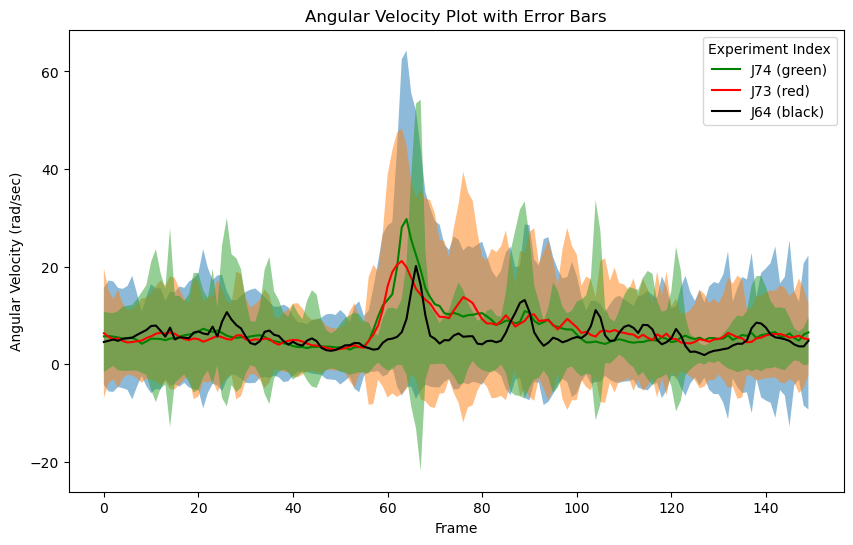

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each dataset with mean and standard deviation
plot_mean_and_std(np.abs(AngV_J74_Gal4), ax=ax, label='J74 (green)', color='green')
plot_mean_and_std(np.abs(AngV_J73_Gal4), ax=ax, label='J73 (red)', color='red')
plot_mean_and_std(np.abs(AngV_J64), ax=ax, label='J64 (black)', color='black')

# Add labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (rad/sec)")
ax.set_title("Angular Velocity Plot with Error Bars")

# Show legend
ax.legend(title="Experiment Index")

# Show the plot
plt.show()


In [18]:
import numpy as np
from scipy import stats

# Convert lists to NumPy arrays if they aren't already arrays
AngV_J74_Gal4 = np.array(AngV_J74_Gal4)
AngV_J73_Gal4 = np.array(AngV_J73_Gal4)
AngV_J64 = np.array(AngV_J64)

# Flatten the arrays if needed (if they are multidimensional)
AngV_J74_Gal4 = AngV_J74_Gal4.flatten()
AngV_J73_Gal4 = AngV_J73_Gal4.flatten()
AngV_J64 = AngV_J64.flatten()

# Perform t-test between J74 and J73
t_stat, p_value = stats.ttest_ind(AngV_J74_Gal4, AngV_J73_Gal4)

# Print t-statistic and p-value
print(f"T-test between J74 and J73: t-stat = {t_stat:.2f}, p-value = {p_value:.2e}")


f_stat, p_value = stats.f_oneway(AngV_J74_Gal4, AngV_J73_Gal4, AngV_J64)
print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.2e}")


T-test between J74 and J73: t-stat = -2.55, p-value = 1.07e-02
ANOVA: F-statistic = 17.99, p-value = 1.55e-08


In [19]:
data = np.concatenate([AngV_J74_Gal4, AngV_J73_Gal4, AngV_J64])
groups = ['J74'] * len(AngV_J74_Gal4) + ['J73'] * len(AngV_J73_Gal4) + ['J64'] * len(AngV_J64)

tukey_result = pairwise_tukeyhsd(data, groups, alpha=0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   J64    J73   1.6733    0.0   1.008 2.3386   True
   J64    J74   1.3793    0.0  0.7284 2.0302   True
   J73    J74   -0.294 0.0273 -0.5619 -0.026   True
---------------------------------------------------


In [20]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz")
df, csvs["opto"]

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz using pyarrow


(         obj_id    frame     timestamp         x         y         z  \
 0             0   186251  1.727267e+09 -0.131585  0.097662 -0.008131   
 1             0   186252  1.727267e+09 -0.131757  0.098755 -0.003995   
 2             0   186253  1.727267e+09 -0.131680  0.099017 -0.002568   
 3             0   186254  1.727267e+09 -0.131592  0.099009 -0.002264   
 4             0   186255  1.727267e+09 -0.131522  0.098911 -0.002405   
 ...         ...      ...           ...       ...       ...       ...   
 9527032   57000  8266826  1.727348e+09 -0.079032 -0.073880  0.161180   
 9527033   57000  8266827  1.727348e+09 -0.078870 -0.073162  0.162114   
 9527034   57000  8266828  1.727348e+09 -0.078678 -0.072331  0.163072   
 9527035   57000  8266829  1.727348e+09 -0.078337 -0.071388  0.164042   
 9527036   57000  8266830  1.727348e+09 -0.078002 -0.070387  0.165081   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.039390  0.061711  0.230551  1.373796e-07

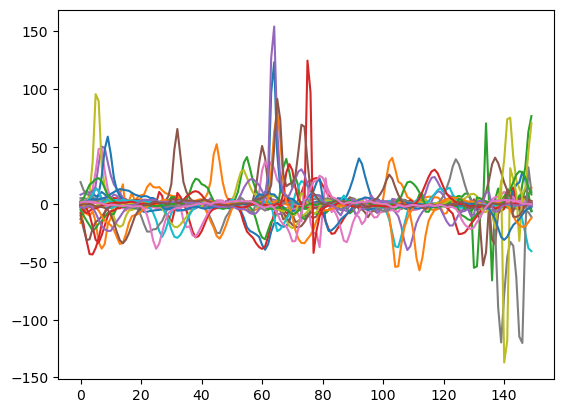

In [21]:
data7 = extract_stimulus_centered_data(df, csvs["opto"])
list(data7)
AngV_J72 = data7['angular_velocity']
fig = plt.figure()
for d in AngV_J72:
    plt.plot(d)

plt.show()

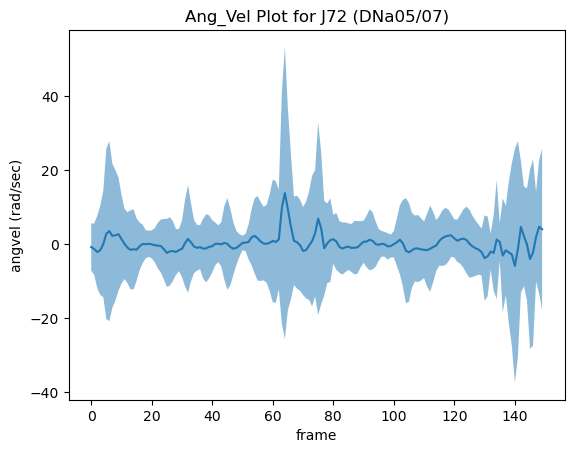

In [22]:
fig_combined, ax_combined = plt.subplots()
plot_mean_and_std(AngV_J72, ax=ax_combined)
ax_combined.set_xlabel("frame")
ax_combined.set_ylabel("angvel (rad/sec)")
ax_combined.set_title("Ang_Vel Plot for J72 (DNa05/07)")
plt.show()

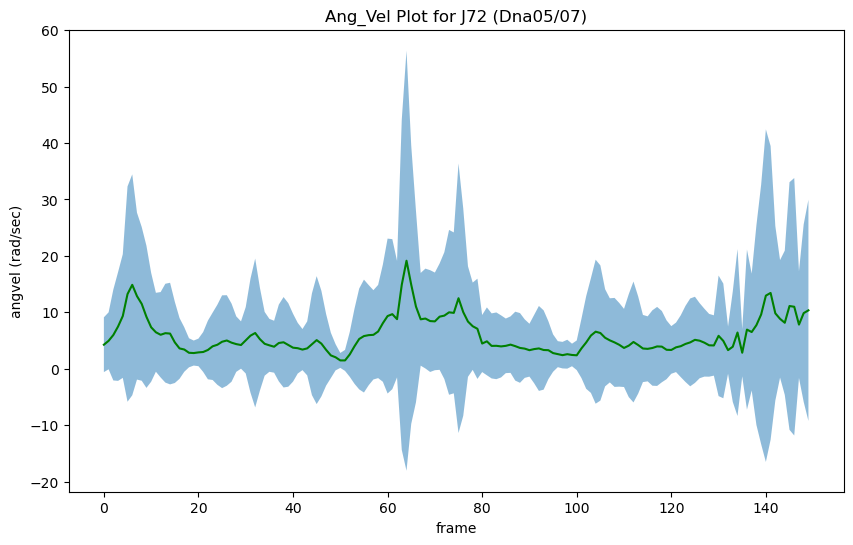

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV_J72), ax=ax, label='Ang_Vel Plot of J72', color='green')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.set_title("Ang_Vel Plot for J72 (Dna05/07)")

plt.show()